**Question 1: What is hypothesis testing in statistics?**

Answer:- Hypothesis testing in statistics is a method to make decisions or inferences about a population based on sample data.
It tests an assumption (called the null hypothesis, H₀) against an alternative (H₁) using probability.

H₀ (Null Hypothesis): No effect / no difference.

H₁ (Alternative Hypothesis): There is an effect / difference.
We use a test statistic (like t-test, z-test) and a p-value to decide whether to reject H₀.

If p-value < significance level (α, e.g., 0.05) → Reject H₀.

Hypothesis testing is like a court trial for data — the null hypothesis is "innocent until proven guilty," and only strong evidence (low p-value) can convict it.


In [2]:
import numpy as np
from scipy import stats

data = np.array([172, 168, 171, 169, 173, 170, 174])

# Hypothesized population mean
mu = 170

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, mu)

print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))

if p_value < 0.05:
    print("Reject H₀: The mean height is significantly different from 170 cm")
else:
    print("Fail to Reject H₀: No significant difference from 170 cm")


t-statistic: 1.225
p-value: 0.2666
Fail to Reject H₀: No significant difference from 170 cm


**Question 2: What is the null hypothesis, and how does it differ from the alternative
hypothesis?**

Answer:- Null Hypothesis (H₀):

It's the default assumption that there is no effect, no difference, or no relationship.

Example: “The average exam score of Class A = 70.”

Alternative Hypothesis (H₁ or Ha):

It's the contradictory claim to H₀, suggesting there is an effect, difference, or relationship.

Example: “The average exam score of Class A ≠ 70.”

Think of H₀ as “innocent until proven guilty” and H₁ as “guilty” — only strong evidence (low p-value) can shift belief from H₀ to H

In [5]:
import numpy as np
from scipy.stats import binomtest

# 100 coin flips, 60 heads
heads = 60
n = 100

# Test (H₀: coin is fair, p=0.5)
result = binomtest(heads, n, p=0.5, alternative='two-sided')
p_value = result.pvalue

print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Coin may be biased")
else:
    print("Fail to Reject H₀: Coin appears fair")

p-value: 0.056887933640980784
Fail to Reject H₀: Coin appears fair


**Question 3: Explain the significance level in hypothesis testing and its role in deciding
the outcome of a test.**

Answer:- Significance Level (α):

The threshold probability we set before a hypothesis test to decide whether to reject the null hypothesis (H₀).

Commonly: α = 0.05 (5%) → means we are willing to accept a 5% risk of wrongly rejecting H₀ (Type I error).

Role in Hypothesis Testing:

Set α (e.g., 0.05).

Compute p-value from test.

Compare:

If p-value ≤ α → Reject H₀ (evidence supports H₁).

If p-value > α → Fail to reject H₀ (not enough evidence).

The significance level is like a “judge’s strictness.”

A strict judge (α = 0.01) requires stronger evidence to convict H₀.

A lenient judge (α = 0.10) convicts more easily.

In [8]:
import numpy as np
from scipy import stats

# Sample dice rolls
data = np.array([2, 3, 4, 6, 5, 3, 4, 6, 2, 5])

# Hypothesized mean
mu = 3.5

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, mu)

alpha = 0.05  # Significance level

print("p-value:", round(p_value, 4))
print("alpha:", alpha)

if p_value <= alpha:
    print("Reject H₀: Dice may not be fair")
else:
    print("Fail to Reject H₀: No evidence against fairness")


p-value: 0.3165
alpha: 0.05
Fail to Reject H₀: No evidence against fairness


**Question 4: What are Type I and Type II errors? Give examples of each.**

Answer:-Type I Error (False Positive)

Definition: Rejecting the null hypothesis (H₀) when it is actually true.

Meaning: You conclude there is an effect when in reality there isn't.

Probability: Equal to significance level (α).

Example:
A medical test says a healthy person has a disease.
(H₀: Person is healthy → wrongly rejected).

Type II Error (False Negative)

Definition: Failing to reject the null hypothesis when it is actually false.

Meaning: You conclude there is no effect when in reality there is one.

Probability: Denoted by β (related to test power = 1 - β).

Example:
A medical test fails to detect a disease in a sick person.
(H₀: Person is healthy → wrongly accepted).

Type I = False Alarm (seeing an effect that isn't there).

Type II = Missed Alarm (missing a real effect).

In [10]:
import numpy as np
from scipy.stats import binomtest

# 100 flips, got 60 heads
heads, n = 60, 100
result = binomtest(heads, n, p=0.5)
p_value = result.pvalue

alpha = 0.05

if p_value < alpha:
    print("Reject H₀ (possible Type I error if coin is actually fair)")
else:
    print("Fail to Reject H₀ (possible Type II error if coin is actually biased)")

Fail to Reject H₀ (possible Type II error if coin is actually biased)


**Question 5: What is the difference between a Z-test and a T-test? Explain when to use
each.**

Answer:- Z-test

Used when:

Population variance (σ²) is known, or

Sample size is large (n ≥ 30) (Central Limit Theorem applies).

Distribution: Standard Normal (Z ~ N(0,1)).

Example: Checking if average height of 500 students differs from 170 cm (large sample, σ known).

T-test

Used when:

Population variance is unknown,

Sample size is small (n < 30).

Distribution: Student’s t-distribution (fatter tails than Z).

Example: Checking if average height of 12 students differs from 170 cm (small sample, σ unknown).

Z-test = Big picture, known certainty.

T-test = Small sample, more uncertainty.



In [13]:
import numpy as np
from scipy import stats

# Small sample (T-test)
sample_small = np.array([172, 168, 171, 169, 173])
t_stat, p_val_t = stats.ttest_1samp(sample_small, 170)

# Large sample (Z-test approximation)
sample_large = np.random.normal(170, 10, 1000)  # n=1000, σ known
z_stat = (np.mean(sample_large) - 170) / (10/np.sqrt(1000))
p_val_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("T-test p-value:", round(p_val_t, 4))
print("Z-test p-value:", round(p_val_z, 4))


T-test p-value: 0.5529
Z-test p-value: 0.6465


**Question 6: Write a Python program to generate a binomial distribution with n=10 and**
**p=0.5, then plot its histogram.**

**(Include your Python code and output in the code box below.)**
**Hint: Generate random number using random function.**

Answer:- Simulates 1000 experiments of tossing a fair coin 10 times.

Counts how many “successes” (heads) occur in each experiment.

Plots a histogram showing the probability distribution.

The output histogram will look bell-shaped and centered around 5, since the expected value is:

𝐸
[
𝑋
]
=
𝑛
×
𝑝
=
10
×
0.5
=
5
E[X]=n×p=10×0.5=5

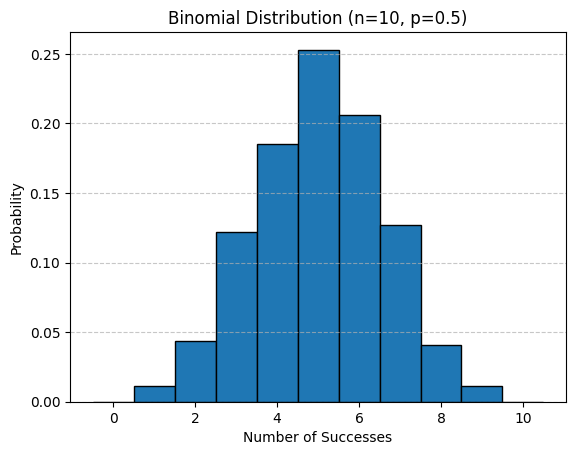

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10      # number of trials
p = 0.5     # probability of success
size = 1000 # number of experiments

# Generate random numbers from Binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=np.arange(0, n+2)-0.5, edgecolor='black', density=True)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


**Question 7: Implement hypothesis testing using Z-statistics for a sample dataset in**
**Python. Show the Python code and interpret the results.**
**sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,**
                        **50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,**
                        **50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,**
                        **50.3, 50.4, 50.0, 49.7, 50.5, 49.9]**
**(Include your Python code and output in the code box below.)**

Answer:- Null Hypothesis (H₀): Population mean = 50

Alternative Hypothesis (H₁): Population mean ≠ 50

Significance Level (α): 0.05

ypothesis Testing using Z-statistics

A Z-test is a type of hypothesis test used when:

The sample size is large (n ≥ 30), or

The population variance (σ²) is known.

It compares the sample mean (x̄) with the population mean (μ) to check if the difference is statistically significant.

Null Hypothesis (H₀): μ = μ₀ (no difference).

Alternative Hypothesis (H₁): μ ≠ μ₀ (two-tailed test).

The Z-statistic formula is:

𝑍
=
𝑋
ˉ
−
𝜇
𝜎
/
𝑛
Z=
σ/
n
	​

X
ˉ
−μ
	​


Where:

𝑋
ˉ
X
ˉ
 = sample mean

μ = population mean (hypothesized)

σ = population standard deviation (or sample std as estimate)

n = sample size

Decision rule (two-tailed test):

If p-value ≤ α → Reject H₀

If p-value > α → Fail to reject H₀

In [15]:
import numpy as np
from scipy import stats

# Sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# Convert to numpy array
data = np.array(sample_data)

# Hypothesized population mean
mu = 50

# Sample mean and std
x_bar = np.mean(data)
s = np.std(data, ddof=1)  # sample standard deviation
n = len(data)

# Z-statistic
z_stat = (x_bar - mu) / (s / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("Sample Mean:", round(x_bar, 3))
print("Z-statistic:", round(z_stat, 3))
print("p-value:", round(p_value, 4))

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: The sample mean is significantly different from 50")
else:
    print("Fail to Reject H₀: No significant difference from 50")


Sample Mean: 50.089
Z-statistic: 0.994
p-value: 0.3202
Fail to Reject H₀: No significant difference from 50


**Question 8: Write a Python script to simulate data from a normal distribution and**
**calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.**
**(Include your Python code and output in the code box below.)**

Answer:- A confidence interval (CI) gives a range of plausible values for a population parameter (like the mean).

Formula for 95% CI of the mean:

𝐶
𝐼
=
𝑋
ˉ
±
𝑍
𝛼
/
2
×
𝑠
𝑛
CI=
X
ˉ
±Z
α/2
	​

×
n
	​

s
	​


Where:

𝑋
ˉ
X
ˉ
 = sample mean

𝑠
s = sample standard deviation

𝑛
n = sample size

𝑍
𝛼
/
2
Z
α/2
	​

 = critical value (for 95% CI, ≈ 1.96)

Interpretation: “We are 95% confident that the true mean lies within this interval.”

The confidence interval is like a safety net — it doesn’t say the true mean is exactly the sample mean, but that it almost surely lies within the given range (95% of the time).


Prints the sample mean and 95% CI.

Shows a histogram of simulated normal data, with vertical lines marking the mean (red) and CI bounds (green).

Sample Mean: 49.481
95% Confidence Interval: (np.float64(48.591), np.float64(50.371))


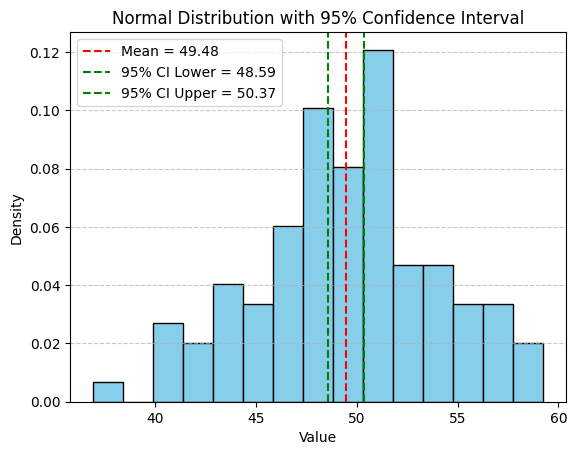

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Simulate data from a normal distribution
np.random.seed(42)  # for reproducibility
data = np.random.normal(loc=50, scale=5, size=100)  # mean=50, std=5, n=100

# Sample statistics
mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)

# 95% Confidence Interval
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)  # Z = 1.96 for 95%
margin_of_error = z_critical * (std / np.sqrt(n))
ci_lower, ci_upper = mean - margin_of_error, mean + margin_of_error

print("Sample Mean:", round(mean, 3))
print("95% Confidence Interval:", (round(ci_lower, 3), round(ci_upper, 3)))

# Plot the data
plt.hist(data, bins=15, color="skyblue", edgecolor="black", density=True)
plt.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.2f}")
plt.axvline(ci_lower, color='green', linestyle='--', label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle='--', label=f"95% CI Upper = {ci_upper:.2f}")

plt.title("Normal Distribution with 95% Confidence Interval")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


**Question 9: Write a Python function to calculate the Z-scores from a dataset and**
**visualize the standardized data using a histogram. Explain what the Z-scores represent**
**in terms of standard deviations from the mean.**
**(Include your Python code and output in the code box below.)**

Answer:- A Z-score tells us how many standard deviations a data point is from the mean.

Formula:

𝑍
=
𝑋
−
𝜇
𝜎
Z=
σ
X−μ
	​


Where:

𝑋
X = individual data point

𝜇
μ = sample mean

𝜎
σ = sample standard deviation

 Interpretation:

Z = 0 → exactly at the mean

Z = +1 → 1 std above the mean

Z = -2 → 2 std below the mean

This standardization helps compare values from different distributions.

Z-scores reframe your data into a universal scale — everything is measured in “standard deviations from the mean,” making comparisons across datasets easy.

Original Mean: 48.962
Original Std Dev: 9.082
Z-scores (first 5): [ 0.661 -0.038  0.828  1.791 -0.143]


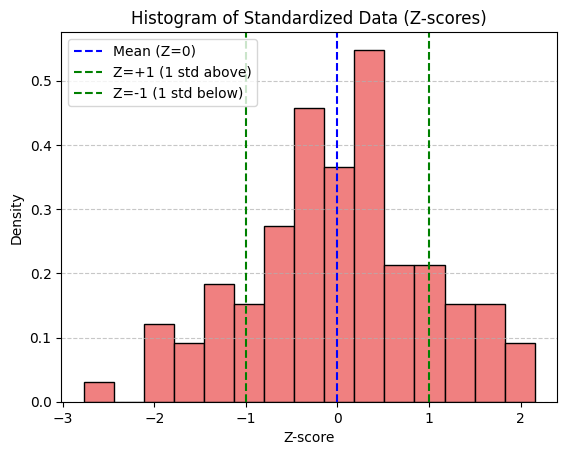

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Z-scores
def calculate_z_scores(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # sample standard deviation
    z_scores = (data - mean) / std
    return z_scores

# Generate sample dataset
np.random.seed(42)
data = np.random.normal(50, 10, 100)  # mean=50, std=10, n=100

# Calculate Z-scores
z_scores = calculate_z_scores(data)

# Print some results
print("Original Mean:", round(np.mean(data), 3))
print("Original Std Dev:", round(np.std(data, ddof=1), 3))
print("Z-scores (first 5):", np.round(z_scores[:5], 3))

# Plot histogram of Z-scores
plt.hist(z_scores, bins=15, color="lightcoral", edgecolor="black", density=True)
plt.title("Histogram of Standardized Data (Z-scores)")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.axvline(0, color='blue', linestyle='--', label="Mean (Z=0)")
plt.axvline(1, color='green', linestyle='--', label="Z=+1 (1 std above)")
plt.axvline(-1, color='green', linestyle='--', label="Z=-1 (1 std below)")
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()
